# EDA Flood o Inundación

Usando dataset ../../Data/02ParaLimpiar/02desastres_paralimpiar.csv

## Objetivo

### Identificar condiciones y patrones relacionadas a inundaciones

## Importar librerías

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 40)
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar datos

In [3]:
df = pd.read_csv('../../Data/02ParaLimpiar/02desastres_paralimpiar.csv', encoding='utf-8', delimiter=';', engine='python')

# Verificar carga de dataset

##  Resumen básico shape, info, head

In [4]:
df.shape
# Resultado: 16636 filas y 20 columnas)

(16636, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16636 entries, 0 to 16635
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dis No             16636 non-null  object 
 1   Seq                16636 non-null  int64  
 2   Disaster Subgroup  16636 non-null  object 
 3   Disaster Type      16636 non-null  object 
 4   Disaster Subtype   13313 non-null  object 
 5   Country            16636 non-null  object 
 6   ISO                16636 non-null  object 
 7   Region             16636 non-null  object 
 8   Continent          16636 non-null  object 
 9   Location           14825 non-null  object 
 10  Origin             4085 non-null   object 
 11  Dis Mag Value      5064 non-null   float64
 12  Dis Mag Scale      15416 non-null  object 
 13  Latitude           2775 non-null   object 
 14  Longitude          2775 non-null   object 
 15  Start Year         16636 non-null  int64  
 16  Start Month        162

In [7]:
df.head(20)

,Dis No,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,Location,Origin,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Start Year,Start Month,End Year,End Month,CPI
0,1900-9002-CPV,9002,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,Countrywide,NaN,NaN,Km2,NaN,NaN,1900,NaN,1900,NaN,"2,849084409"
1,1900-9001-IND,9001,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,Bengal,NaN,NaN,Km2,NaN,NaN,1900,NaN,1900,NaN,"2,849084409"
2,1902-0012-GTM,12,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,"Quezaltenango, San Marcos",NaN,8.0,Richter,14,-91,1902,4.0,1902,4.0,"2,963047785"
3,1902-0003-GTM,3,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,NaN,NaN,NaN,NaN,NaN,NaN,1902,4.0,1902,4.0,"2,963047785"
4,1902-0010-GTM,10,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,NaN,NaN,NaN,NaN,NaN,NaN,1902,10.0,1902,10.0,"2,963047785"
5,1903-0006-CAN,6,Geophysical,Mass movement (dry),Rockfall,Canada,CAN,Northern America,Americas,"Frank, Alberta",NaN,NaN,NaN,NaN,NaN,1903,4.0,1903,4.0,"3,077011162"
6,1903-0012-COM,12,Geophysical,Volcanic activity,Ash fall,Comoros (the),COM,Eastern Africa,Africa,NaN,NaN,NaN,NaN,NaN,NaN,1903,NaN,1903,NaN,"3,077011162"
7,1904-0003-BGD,3,Meteorological,Storm,Tropical cyclone,Bangladesh,BGD,Southern Asia,Asia,Chittagong,NaN,NaN,Kph,NaN,NaN,1904,11.0,1904,11.0,"3,077011162"
8,1905-0005-CAN,5,Geophysical,Mass movement (dry),Rockfall,Canada,CAN,Northern America,Americas,"Spence's Bridge, British Columbia",NaN,NaN,NaN,NaN,NaN,1905,8.0,1905,8.0,"3,077011162"
9,1905-0003-IND,3,Geophysical,Earthquake,Ground movement,India,IND,Southern Asia,Asia,Kangra,NaN,8.0,Richter,32.04,76.16,1905,4.0,1905,4.0,"3,077011162"


## Columns

In [6]:
df.columns

Index(['Dis No', 'Seq', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude',
       'Start Year', 'Start Month', 'End Year', 'End Month', 'CPI'],
      dtype='object')

# Pivot table: Seq, Country, Disaster Type, Disaster Subtype, Dis Mag Scale y Dis Mag Value

Relacionar número de secuencia con país(es) y tipo de desastre así como su subtipo y magnitud

In [6]:
# Filtrar el dataset original
filtered_data = df[['Seq', 'Country', 'Disaster Type', 'Disaster Subtype', 'Dis Mag Scale', 'Dis Mag Value']]

# Crear pivot table considerada pivot principal
pivot_seq_country_distype_mag = pd.pivot_table(filtered_data, values='Country', index=['Seq', 'Country', 'Disaster Subtype', 'Dis Mag Scale', 'Dis Mag Value'], aggfunc=lambda x: ', '.join(x))

# Mostrar pivot table principal
print(pivot_seq_country_distype_mag)

                                                                                           Disaster Type
Seq  Country           Disaster Subtype                 Dis Mag Scale Dis Mag Value                     
1    Australia         Land fire (Brush, Bush, Pasture) Km2            1000.0                   Wildfire
                                                                       8000.0                   Wildfire
     Azores Islands    Ground movement                  Richter        7.0                    Earthquake
     Bangladesh        Cold wave                        ?C            -4.0           Extreme temperature
     Chile             Ground movement                  Richter        8.0                    Earthquake
...                                                                                                  ...
9557 China             Drought                          Km2            60000.0                   Drought
9564 China             Drought                         

## EDA de países que comparten secuencia 'Seq'

In [7]:
# Comprobación de nomenclatura y conteo de Disaster Type
# df.groupby('Dis No')['Disaster Type'].count() # comprobación de que todos los desastres cuentan con un Dis No
disaster_type_seq = df.groupby('Seq')['Disaster Type'].value_counts() # Length: 4630
disaster_type_seq

Seq   Disaster Type
1     Earthquake       20
      Flood            17
      Epidemic         12
      Storm            12
      Landslide         5
                       ..
9853  Drought           1
9854  Drought           2
9860  Drought           2
9863  Drought           1
9881  Drought           1
Name: Disaster Type, Length: 4630, dtype: int64

In [8]:
seq_by_countries = df.groupby(['Seq', 'Disaster Type'])['Country'].unique()

# Convertir la agrupación a DataFrame
seq_by_countries = seq_by_countries.to_frame()
seq_by_countries
# 4630 rows

Country
Seq  Disaster Type                                                         
1    Earthquake           [Chile, Greece, Ecuador, Algeria, Italy, Taiwa...
     Epidemic             [India, China, Bangladesh, Ecuador, Uganda, So...
     Extreme temperature                      [Bangladesh, Poland, Ukraine]
     Flood                [China, Bangladesh, Pakistan, Mexico, Morocco,...
     Landslide            [Norway, United States of America (the), Sovie...
...                                                                     ...
9853 Drought                               [United States of America (the)]
9854 Drought                                               [China, Namibia]
9860 Drought                                          [Honduras, Nicaragua]
9863 Drought                                                      [Uruguay]
9881 Drought                             [Bolivia (Plurinational State of)]

[4630 rows x 1 columns]

In [9]:
# Filtro para encontrar las secuencias con más de 1 país
# Necesario hacer .copy() para evitar Warning: A value is trying to be set on a copy of a slice from a DataFrame.
filtered_seq = seq_by_countries[seq_by_countries['Country'].apply(lambda x: len(x) > 1)].copy()
filtered_seq

Country
Seq  Disaster Type                                                         
1    Earthquake           [Chile, Greece, Ecuador, Algeria, Italy, Taiwa...
     Epidemic             [India, China, Bangladesh, Ecuador, Uganda, So...
     Extreme temperature                      [Bangladesh, Poland, Ukraine]
     Flood                [China, Bangladesh, Pakistan, Mexico, Morocco,...
     Landslide            [Norway, United States of America (the), Sovie...
...                                                                     ...
9786 Drought                                               [Zimbabwe, Mali]
9787 Drought                                              [Zambia, Nigeria]
9788 Drought                                        [Bulgaria, Sudan (the)]
9854 Drought                                               [China, Namibia]
9860 Drought                                          [Honduras, Nicaragua]

[2729 rows x 1 columns]

In [10]:
# Al usar ', '.join(x) en la función apply(), los nombres de los países se unirán con un separador de coma:
filtered_seq['Country'] = filtered_seq['Country'].apply(lambda x: ', '.join(x))
filtered_seq

Country
Seq  Disaster Type                                                         
1    Earthquake           Chile, Greece, Ecuador, Algeria, Italy, Taiwan...
     Epidemic             India, China, Bangladesh, Ecuador, Uganda, Sov...
     Extreme temperature                        Bangladesh, Poland, Ukraine
     Flood                China, Bangladesh, Pakistan, Mexico, Morocco, ...
     Landslide            Norway, United States of America (the), Soviet...
...                                                                     ...
9786 Drought                                                 Zimbabwe, Mali
9787 Drought                                                Zambia, Nigeria
9788 Drought                                          Bulgaria, Sudan (the)
9854 Drought                                                 China, Namibia
9860 Drought                                            Honduras, Nicaragua

[2729 rows x 1 columns]

In [11]:
# Ordenar el DataFrame por el número de desastres compartidos
filtered_seq.sort_values('Disaster Type', ascending=False, inplace=True)
filtered_seq
# 2729 rows

,,Country
Seq,Disaster Type,
256,Wildfire,"France, Greece"
357,Wildfire,"Greece, United States of America (the)"
18,Wildfire,"Canada, Australia"
129,Wildfire,"Hong Kong, Argentina"
42,Wildfire,"Ecuador, Chile"
...,...,...
9126,Drought,"Australia, Mauritania"
9128,Drought,"Indonesia, Uganda, China"
9131,Drought,"Indonesia, Nepal"


### La combinación top 10 de países con el mayor número de desastres compartidos:

In [12]:
filtered_seq['Country'].value_counts().head(10)
filtered_seq

,,Country
Seq,Disaster Type,
256,Wildfire,"France, Greece"
357,Wildfire,"Greece, United States of America (the)"
18,Wildfire,"Canada, Australia"
129,Wildfire,"Hong Kong, Argentina"
42,Wildfire,"Ecuador, Chile"
...,...,...
9126,Drought,"Australia, Mauritania"
9128,Drought,"Indonesia, Uganda, China"
9131,Drought,"Indonesia, Nepal"


Interesante: Muchos países comparten Seq de tipo de desastre de incendios y sequías no por la proximidad geográfica sino por otras condiciones. Habrá que comprobar si se trata de temperaturas elevadas a nivel global. Así como qué condiciones para otros tipos de desastres generan estas agrupaciones de número Seq compartido.

### Las 5 combinaciones más frecuentes de países con secuencia compartida:
* Indonesia, China 8
* Mexico, United States of America(the) 5
* China, Peru 5
* United States of America (the), China 5
* Indonesia, India 4

In [13]:
filtered_seq.value_counts()

Country                                                                                                  
Indonesia, China                                                                                             8
Mexico, United States of America (the)                                                                       5
China, Peru                                                                                                  5
United States of America (the), China                                                                        5
Indonesia, India                                                                                             4
                                                                                                            ..
Ethiopia, Kenya                                                                                              1
Ethiopia, Kenya, Sudan (the), India, Sierra Leone, Honduras, Viet Nam                                        1
Ethiop

In [14]:
filtered_seq.mode()
# Country: Indonesia, China

,Country
0,"Indonesia, China"


In [15]:
filtered_seq.describe()

,Country
count,2729
unique,2591
top,"Indonesia, China"
freq,8


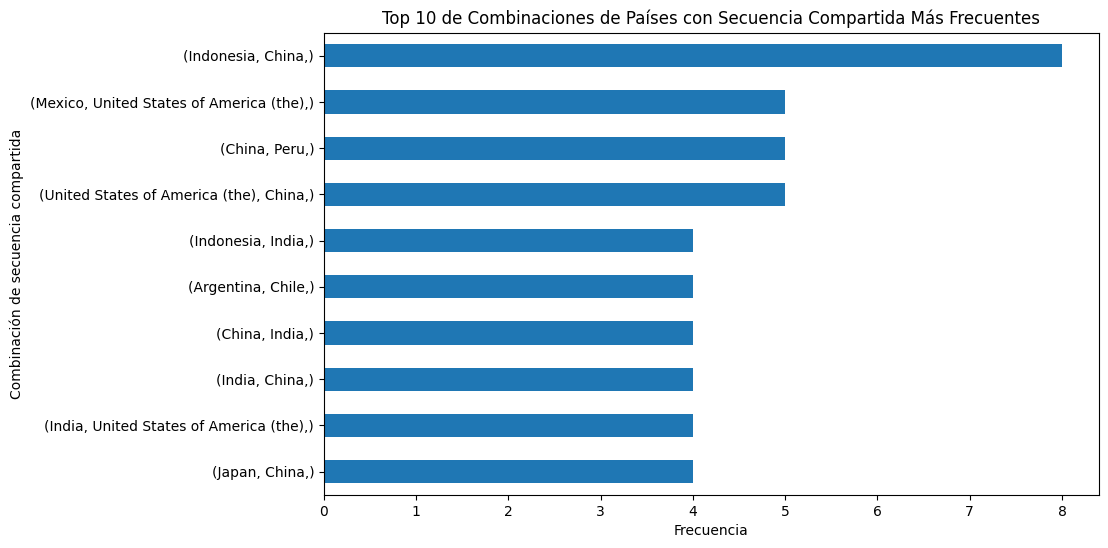

In [16]:
# Combinaciones de países con secuencia compartida más frecuente
top_seq_combinations = filtered_seq.value_counts().head(10)

# Bar plot
plt.figure(figsize=(10, 6))
top_seq_combinations.plot(kind='barh')
plt.xlabel('Frecuencia')
plt.ylabel('Combinación de secuencia compartida')
plt.title('Top 10 de Combinaciones de Países con Secuencia Compartida Más Frecuentes')

# Invertir el y-axis para mostrar en orden descendente
plt.gca().invert_yaxis()

# Show the plot
plt.show()

In [17]:
reshaped_data = pivot_seq_country_distype_mag.reset_index()
reshaped_data

,Seq,Country,Disaster Subtype,Dis Mag Scale,Dis Mag Value,Disaster Type
0,1,Australia,"Land fire (Brush, Bush, Pasture)",Km2,1000.0,Wildfire
1,1,Australia,"Land fire (Brush, Bush, Pasture)",Km2,8000.0,Wildfire
2,1,Azores Islands,Ground movement,Richter,7.0,Earthquake
3,1,Bangladesh,Cold wave,?C,-4.0,Extreme temperature
4,1,Chile,Ground movement,Richter,8.0,Earthquake
...,...,...,...,...,...,...
4596,9557,China,Drought,Km2,60000.0,Drought
4597,9564,China,Drought,Km2,659.0,Drought
4598,9626,China,Drought,Km2,900.0,Drought
4599,9707,Philippines (the),Drought,Km2,3046.0,Drought


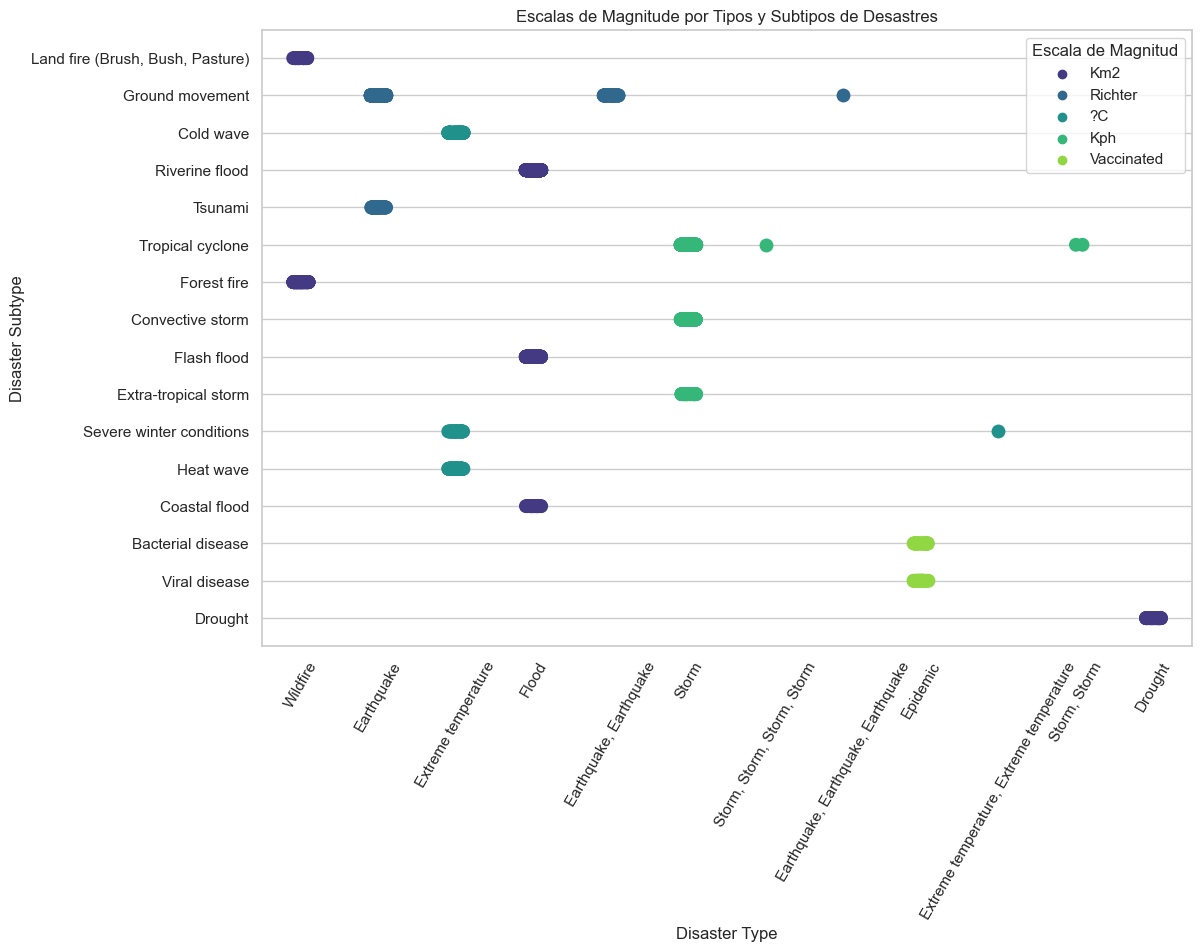

In [30]:
# Crear stripplot
plt.figure(figsize=(12, 8))
sns.stripplot(data=reshaped_data, x='Disaster Type', y='Disaster Subtype', hue='Dis Mag Scale', palette='viridis', dodge=False, jitter=True, size=10)
plt.title('Escalas de Magnitude por Tipos y Subtipos de Desastres')
plt.xlabel('Disaster Type')
plt.ylabel('Disaster Subtype')
plt.legend(title='Escala de Magnitud')
plt.xticks(rotation=60)
plt.show()

## Pivot table reducida con Seq, Country y Disaster Type

In [19]:
# Pivot table reducida con Seq, Country y Disaster Type
pivot_seq_country_distype = pd.pivot_table(filtered_seq, values='Country', index='Seq', columns='Disaster Type', aggfunc=lambda x: ', '.join(x))
print(pivot_seq_country_distype)

Disaster Type                Drought  \
Seq                                    
1                                NaN   
2                                NaN   
3                                NaN   
4                                NaN   
5                                NaN   
...                              ...   
9786                  Zimbabwe, Mali   
9787                 Zambia, Nigeria   
9788           Bulgaria, Sudan (the)   
9854                  China, Namibia   
9860             Honduras, Nicaragua   

Disaster Type                                         Earthquake  \
Seq                                                                
1              Chile, Greece, Ecuador, Algeria, Italy, Taiwan...   
2              Colombia, China, Argentina, Algeria, Italy, Tu...   
3              India, Indonesia, Chile, Taiwan (Province of C...   
4              Costa Rica, Japan, Jamaica, United States of A...   
5              Algeria, Ecuador, Ghana, Chile, United States ...   
...

# Visualizaciones pivot table principal

## Heatmap

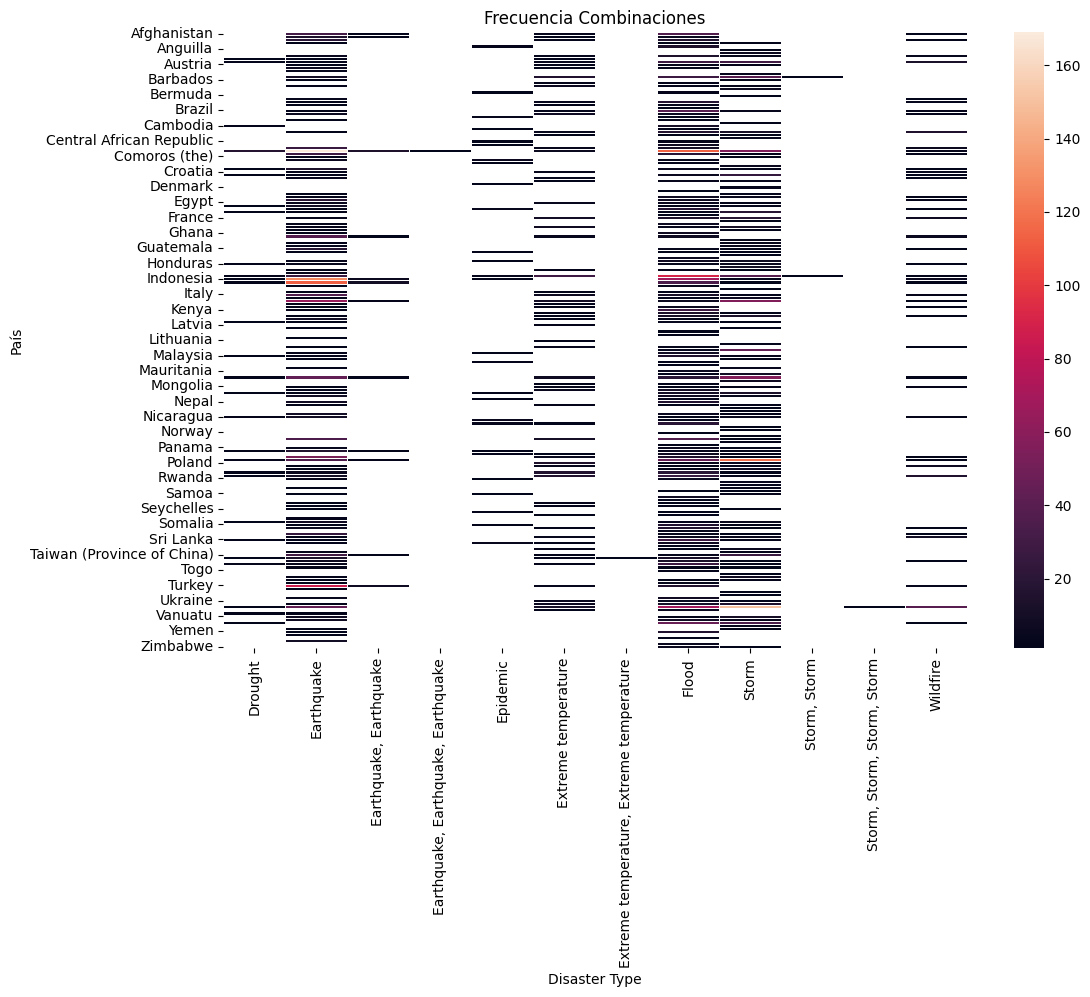

In [20]:
# Reshape de pivot table principal para visualización
heatmap_data = pivot_seq_country_distype_mag.reset_index().pivot_table(index='Country', columns='Disaster Type', values='Seq', aggfunc='count')

# Crear heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='rocket', linewidths=0.5)
plt.title('Frecuencia Combinaciones')
plt.xlabel('Disaster Type')
plt.ylabel('País')
plt.show()


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset to improve visibility
filtered_data = pivot_seq_country_distype_mag.reset_index()
filtered_data = filtered_data[filtered_data['Disaster Type'].isin(['Flood', 'Earthquake', 'Drought'])]
filtered_data = filtered_data[filtered_data['Continent'].isin(['Asia', 'Europe', 'Africa'])]

# Set the style and palette
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=filtered_data, x="Disaster Type", y="Continent", hue="Disaster Subtype", dodge=True)

# Customize the plot
ax.set(ylabel="")
plt.xticks(rotation=60)
plt.xlabel('Disaster Type')
plt.ylabel('Continent')

# Adjust legend position
plt.legend(loc='lower left')

# Reduce font size
plt.rcParams.update({'font.size': 8})

plt.tight_layout()
plt.show()


KeyError: 'Continent'

In [40]:
# Filter the dataset to include only the relevant columns
filtered_data = df[['Disaster Type', 'Continent', 'Region', 'Country', 'ISO', 'Location']]

# Create the pivot table
pivot_geographical_by_disastertype = pd.pivot_table(filtered_data, index=['Continent', 'Region', 'Country', 'ISO'], columns='Disaster Type', aggfunc=len, fill_value=0)

# Display the pivot table
print(pivot_geographical_by_disastertype)


                                                      Location          \
Disaster Type                                  Animal accident Drought   
Continent Region         Country           ISO                           
Africa    Eastern Africa Burundi           BDI               0       6   
                         Comoros (the)     COM               0       1   
                         Djibouti          DJI               0      10   
                         Eritrea           ERI               0       3   
                         Ethiopia          ETH               0      18   
...                                                        ...     ...   
Oceania   Polynesia      Samoa             WSM               0       1   
                         Tokelau           TKL               0       0   
                         Tonga             TON               0       1   
                         Tuvalu            TUV               0       2   
                         Wallis and Fu

### Bar plot: Top 10: Combinaciones de Tipos y Subtipos de Desastres Más Frecuentes por País

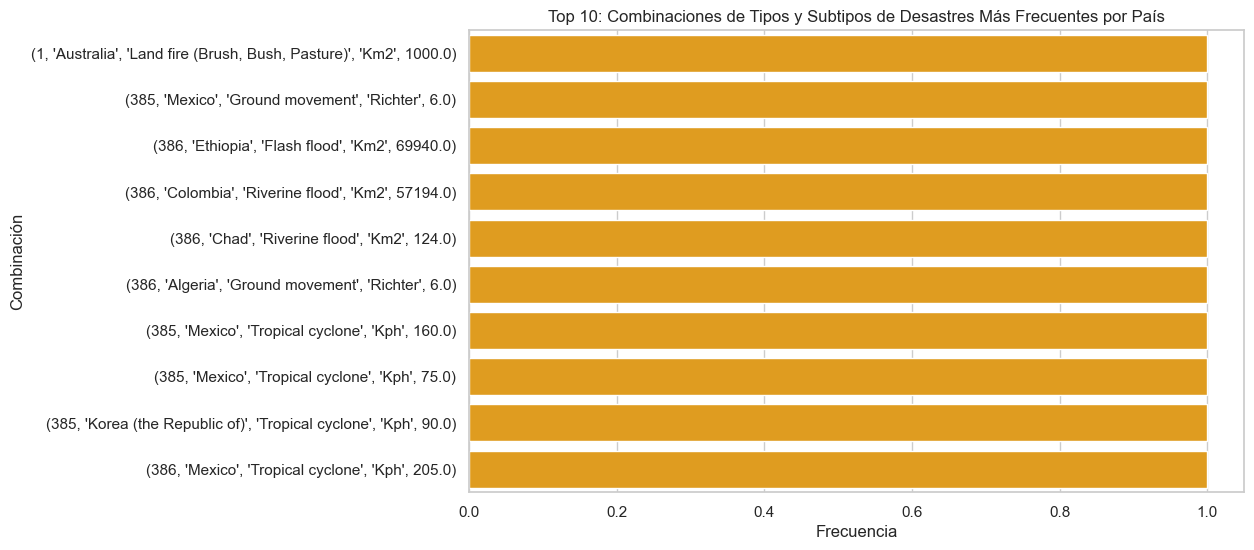

In [22]:
# Top 10 de combinaciones de países más frecuentes
top10_disaster_type_comb = pivot_seq_country_distype_mag.index.value_counts().head(10)

# Crear Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_disaster_type_comb.values, y=top10_disaster_type_comb.index, color='orange')
plt.title('Top 10: Combinaciones de Tipos y Subtipos de Desastres Más Frecuentes por País')
plt.xlabel('Frecuencia')
plt.ylabel('Combinación')
plt.show()


# Conclusiones

# Recomendaciones

# Guardar dataset en csv

In [23]:
# df.to_csv('../../Data/02ParaLimpiar/02desastres_fillna.csv', index=False, sep=';', encoding='utf-8')

Dataset con valores rellenados y/o filas vacías borradas.